### Will This Customer Purchase Your Product?

Analyze online shopping habits: returning vs. new customers using statistics & probability techniques!

In [ ]:
#  # configuring the path of kaggle.json file
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json 

In [2]:
# #!/bin/bash
# !kaggle datasets download abdelazizsami/will-this-customer-purchase-your-product

In [3]:

# # extracting the compressed dataset

# from zipfile import ZipFile
# dataset = 'will-this-customer-purchase-your-product.zip'

# with ZipFile(dataset,'r') as zip:
#     zip.extractall()
#     print("The dataset is extracted")

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [5]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SessionID                12055 non-null  int64  
 1   Administrative           12055 non-null  int64  
 2   Administrative_Duration  12055 non-null  float64
 3   Informational            12055 non-null  int64  
 4   Informational_Duration   12055 non-null  float64
 5   ProductRelated           12055 non-null  int64  
 6   ProductRelated_Duration  12055 non-null  float64
 7   BounceRates              12055 non-null  float64
 8   ExitRates                12055 non-null  float64
 9   PageValues               12055 non-null  float64
 10  SpecialDay               12055 non-null  float64
 11  Weekend                  12055 non-null  bool   
 12  Month                    12055 non-null  object 
 13  CustomerType             12054 non-null  object 
 14  Purchase              

In [6]:
shopping_data.dropna(inplace=True)

In [7]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12054 entries, 0 to 12053
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SessionID                12054 non-null  int64  
 1   Administrative           12054 non-null  int64  
 2   Administrative_Duration  12054 non-null  float64
 3   Informational            12054 non-null  int64  
 4   Informational_Duration   12054 non-null  float64
 5   ProductRelated           12054 non-null  int64  
 6   ProductRelated_Duration  12054 non-null  float64
 7   BounceRates              12054 non-null  float64
 8   ExitRates                12054 non-null  float64
 9   PageValues               12054 non-null  float64
 10  SpecialDay               12054 non-null  float64
 11  Weekend                  12054 non-null  bool   
 12  Month                    12054 non-null  object 
 13  CustomerType             12054 non-null  object 
 14  Purchase                 12

1. What are the purchase rates for online shopping sessions by customer type for November and December? Store the result in a dictionary called purchase_rates in the format below using the exact names for keys.


   purchase_rates = {"Returning_Customer": 0.254, "New_Customer": 0.276}

In [8]:
print(shopping_data['Month'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [9]:
# subset the DataFrame
subset = ['Nov','Dec']
shopping_data_subset = shopping_data[shopping_data['Month'].isin(subset)]
shopping_data_subset.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
5463,5464,1,39.2,2,120.8,7,80.500000,0.000000,0.010000,0.000000,0.0,True,Nov,New_Customer,0.0
5464,5465,3,89.6,0,0.0,57,1721.906667,0.000000,0.005932,204.007949,0.0,True,Nov,Returning_Customer,1.0
5467,5468,4,204.2,0,0.0,31,652.376667,0.012121,0.016162,0.000000,0.0,False,Nov,Returning_Customer,0.0
5479,5480,0,0.0,0,0.0,13,710.066667,0.000000,0.007692,72.522838,0.0,False,Nov,Returning_Customer,1.0
5494,5495,0,0.0,0,0.0,24,968.692424,0.000000,0.000000,106.252517,0.0,False,Nov,Returning_Customer,1.0


In [10]:
freq_return = len(shopping_data_subset[shopping_data_subset['CustomerType']== 'Returning_Customer'])
freq_new = len(shopping_data_subset[shopping_data_subset['CustomerType']== 'New_Customer'])

In [11]:
ratio_return = freq_return/len(shopping_data_subset)
ratio_new = freq_new/len(shopping_data_subset)
purchase_rates = { "Returning-Customer": ratio_return, "New_Customer":ratio_new}
purchase_rates

{'Returning-Customer': 0.8364044943820225, 'New_Customer': 0.16359550561797753}

2.What is the strongest correlation in total time spent among page types by returning customers in November and December? Store the result in a dictionary called top_correlation in the format below using the exact names for keys.

In [12]:
## Identify the strongest correlation in total time spent between different types of pages visited by the returning customers during the months of November and December. 
# Calculate correlation with pandas
cor_admin_info = shopping_data_subset['Administrative_Duration'].corr(shopping_data_subset['Informational_Duration'])
cor_admin_product = shopping_data_subset['Administrative_Duration'].corr(shopping_data_subset['ProductRelated_Duration'])
cor_product_info = shopping_data_subset['ProductRelated_Duration'].corr(shopping_data_subset['Informational_Duration'])
print(cor_admin_info)
print(cor_admin_product)
print(cor_product_info)

0.24468855792839223
0.3898546003206961
0.36712552534442083


In [13]:
# # Another way to solve this is to use Scipy pearsonr function
# cor_admin_info1 = stats.pearsonr(shopping_data_subset['Administrative_Duration'], shopping_data_subset['Informational_Duration'])

# Another way to solve this is to use Pandas correlation matrix
# shopping_data_subset[['Administrative_Duration','Informational_Duration','ProductRelated_Duration' ]].corr()


In [14]:
# Store top correlation
top_correlation = {"pair": ('Administrative_Duration', 'ProductRelated_Duration'), "correlation": cor_admin_product}
print(top_correlation)

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.3898546003206961}


Administrative_Duration ProductRelated_Duration


3. A new campaign for the returning customers will boost the purchase rate by 15%. What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers? Store the result in a variable called prob_at_least_100_sales. Optional: plot a binomial probability distribution chart to visualize your chances

In [21]:
# Purchase is a binomial random variable taking the value of either 0 or 1
# We know that the current purchase rate for the returning customers is
print("Current purchase rate for the returning customer:", ratio_return )

Current purchase rate for the returning customer: 0.8364044943820225


In [23]:
# 15% Increase in this rate would be
increased_rate_return = 1.15 * ratio_return 
print("Increased purchase rate for the returning customer:", increased_rate_return)


Increased purchase rate for the returning customer: 0.9618651685393258


In [18]:
# First, we find the likelihood of having <100 sales of 500 sessions
# We can find this from binomial cdf
prob_sales_100_less = stats.binom.cdf(k=100, n=500, p=increased_rate_return)
print("probability of having <100 sales:", prob_sales_100_less)

probability of having <100 sales: 0.0


In [19]:
# Then, to find the probability of having 100 or more sales is 1-prob_sales_100_less
prob_at_least_100_sales = 1 - prob_sales_100_less
print("probability of having at least 100 sales:", prob_at_least_100_sales)

probability of having at least 100 sales: 1.0


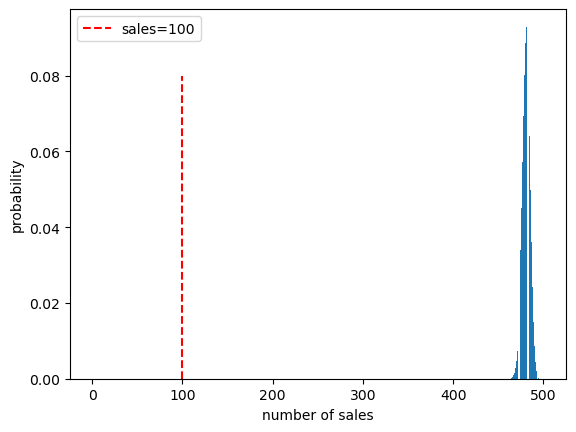

In [20]:
# Plotting the binomial probability distribution
n_sessions = 500
k_values = np.arange(500) + 1
p_binom_values = [stats.binom.pmf(k, n_sessions, increased_rate_return) for k in k_values ] 
plt.bar(k_values, p_binom_values) 
plt.vlines(100, 0, 0.08, color='r', linestyle='dashed', label="sales=100")
plt.xlabel("number of sales")
plt.ylabel("probability")
plt.legend()
plt.show()